           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior h

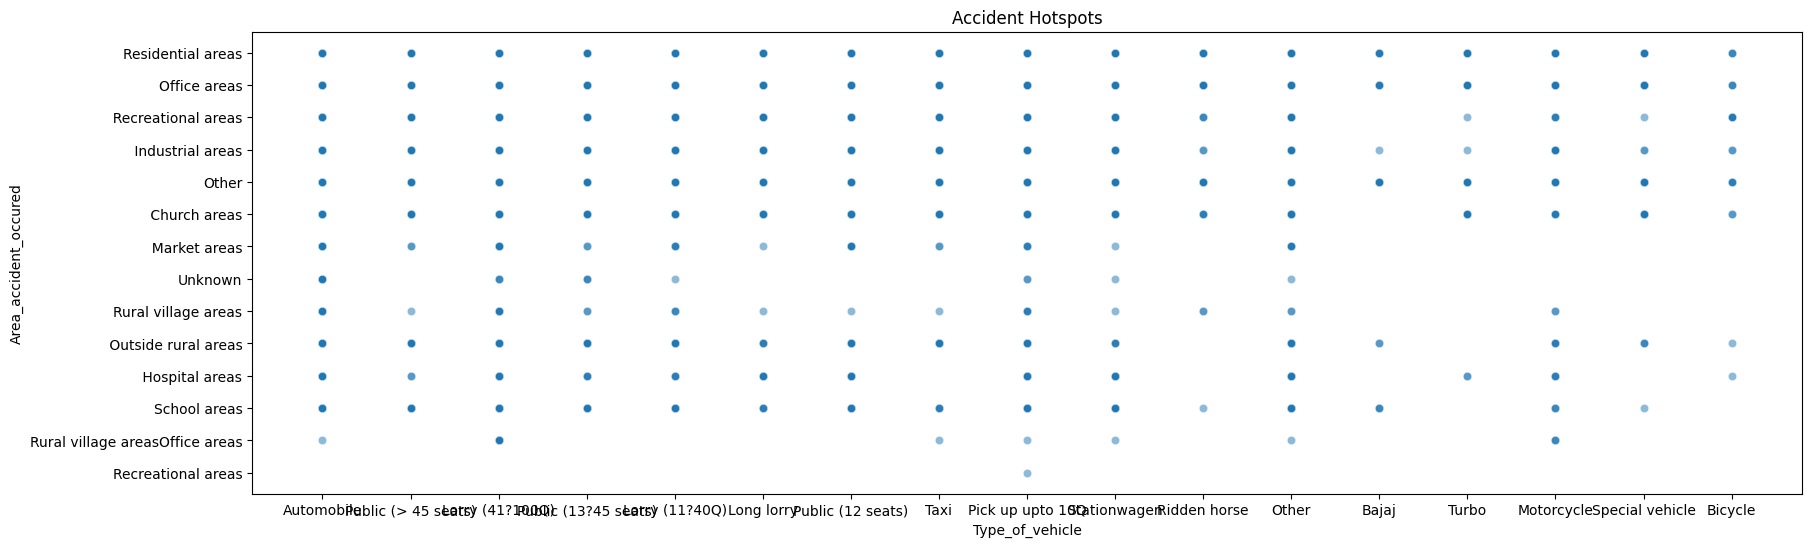

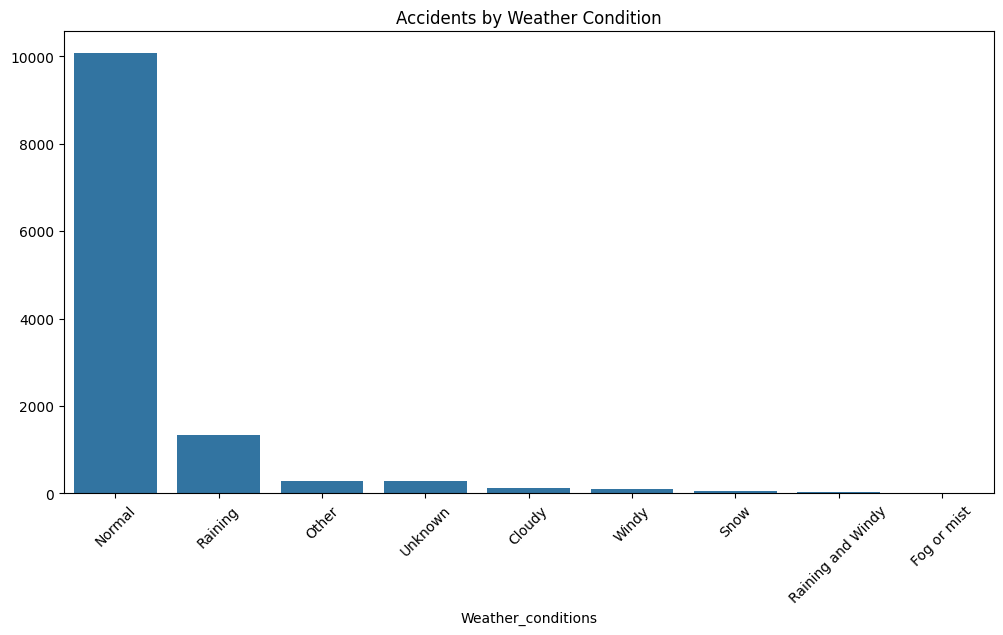

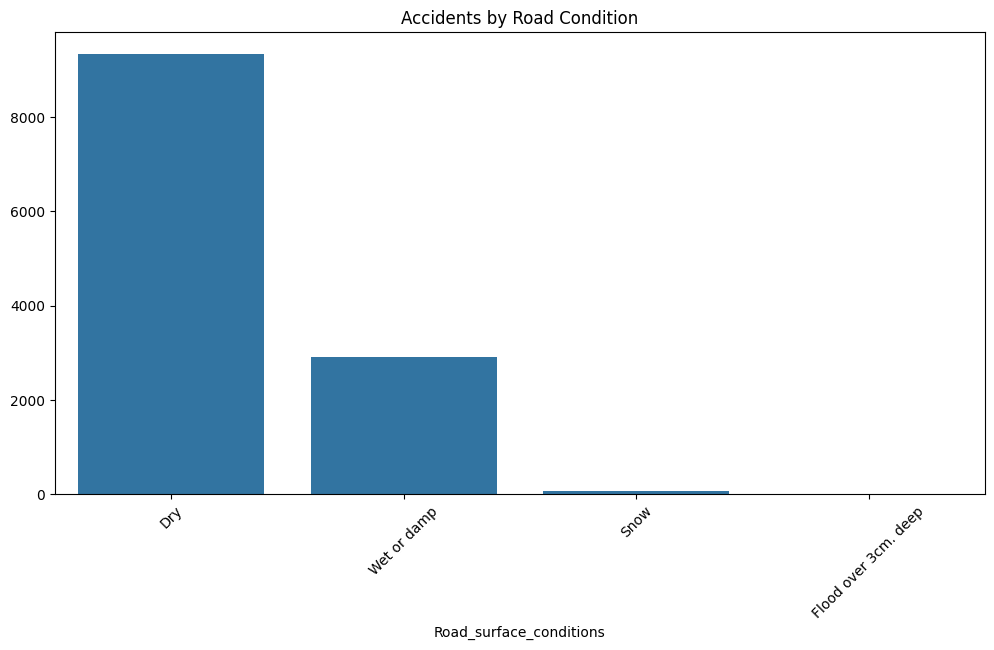

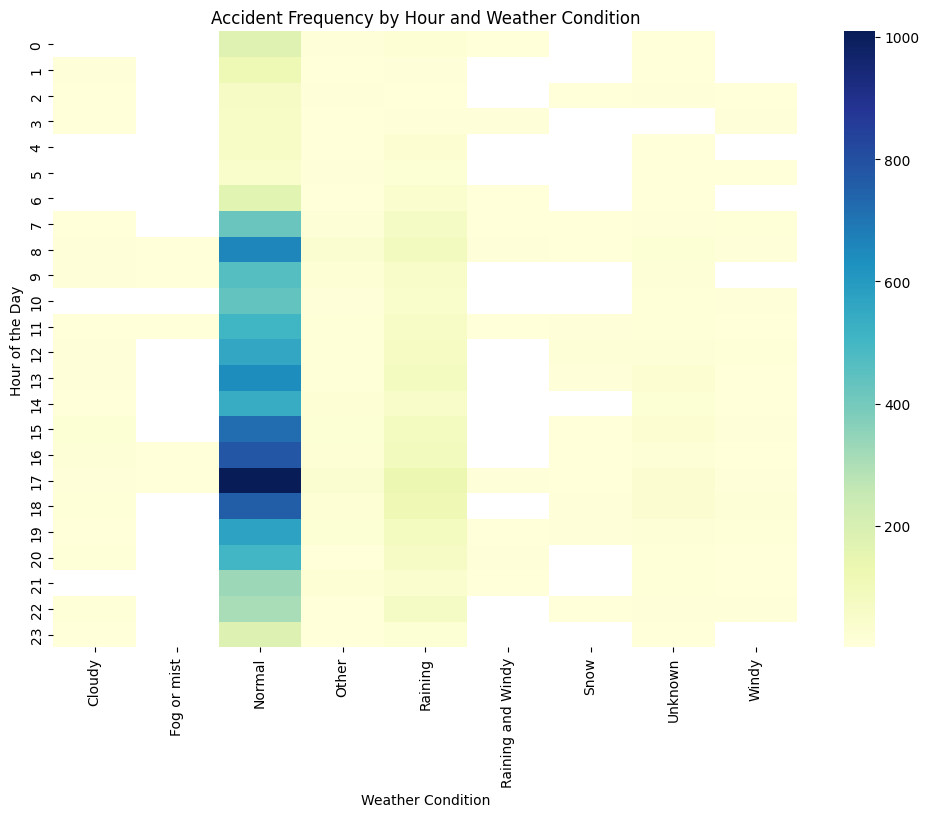

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/home/rguktong/Desktop/Task5.csv')
print(data)
print(data.info())
print(data.head())
print(data.describe())
print(data.columns)
#data cleaning 
print(data.isnull().sum())
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
data['hour'] = data['Time'].dt.hour
accidents_by_hour = data.groupby('hour').size()
accidents_by_weather = data['Weather_conditions'].value_counts()
accidents_by_road_condition = data['Road_surface_conditions'].value_counts()

plt.figure(figsize=(20, 6))


sns.scatterplot(x='Type_of_vehicle', y='Area_accident_occured', data=data, alpha=0.5)
plt.title('Accident Hotspots')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values)
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_road_condition.index, y=accidents_by_road_condition.values)
plt.title('Accidents by Road Condition')
plt.xticks(rotation=45)
plt.show()


heatmap_data = data.groupby(['hour', 'Weather_conditions']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Accident Frequency by Hour and Weather Condition')
plt.ylabel('Hour of the Day')
plt.xlabel('Weather Condition')
plt.show()

